In [52]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sks
import seaborn as sns


In [6]:
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [10]:
df.shape

(150, 5)

In [18]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
df.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

<AxesSubplot:>

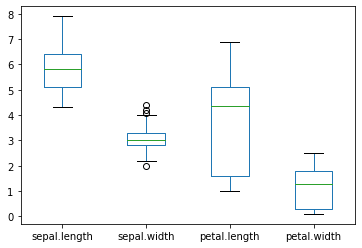

In [29]:
df.plot(kind='box')#, sharex=False, sharey=False)


array([[<AxesSubplot:title={'center':'petal.length'}, xlabel='[variety]'>,
        <AxesSubplot:title={'center':'petal.width'}, xlabel='[variety]'>],
       [<AxesSubplot:title={'center':'sepal.length'}, xlabel='[variety]'>,
        <AxesSubplot:title={'center':'sepal.width'}, xlabel='[variety]'>]],
      dtype=object)

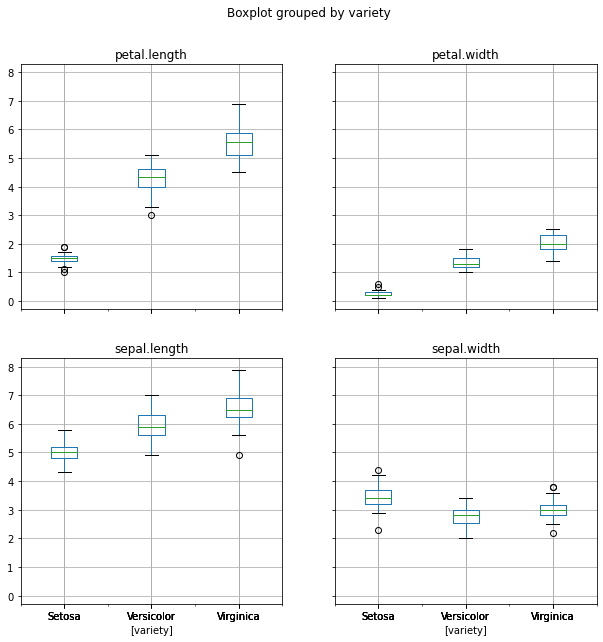

In [30]:
df.boxplot(by="variety",figsize=(10,10))


<AxesSubplot:xlabel='variety', ylabel='petal.length'>

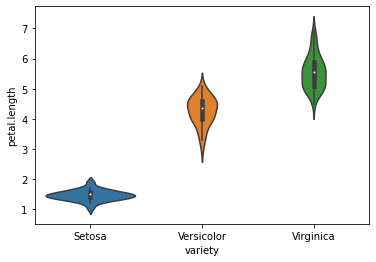

In [36]:
sns.violinplot(data=df,x="variety", y="petal.length")


<AxesSubplot:xlabel='variety', ylabel='sepal.length'>

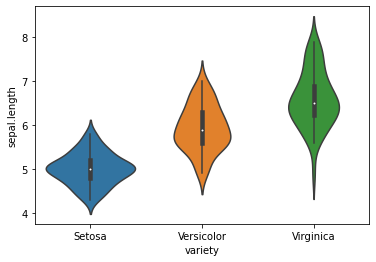

In [38]:
sns.violinplot(data=df,x="variety", y="sepal.length")


<AxesSubplot:xlabel='variety', ylabel='petal.width'>

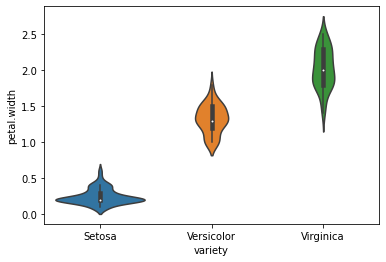

In [40]:
sns.violinplot(data=df,x="variety", y="petal.width")


<AxesSubplot:xlabel='variety', ylabel='sepal.width'>

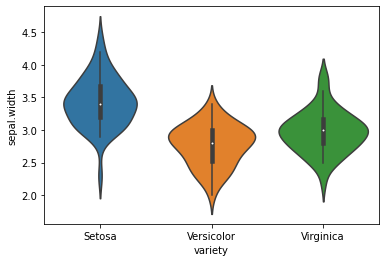

In [42]:
sns.violinplot(data=df,x="variety", y="sepal.width")


array([[<AxesSubplot:title={'center':'sepal.length'}>,
        <AxesSubplot:title={'center':'sepal.width'}>],
       [<AxesSubplot:title={'center':'petal.length'}>,
        <AxesSubplot:title={'center':'petal.width'}>]], dtype=object)

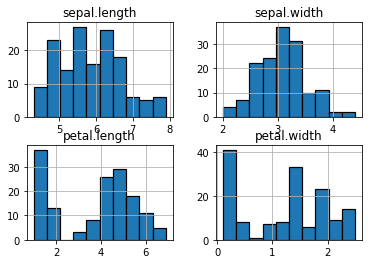

In [43]:
df.hist(edgecolor='black', linewidth=1.2)


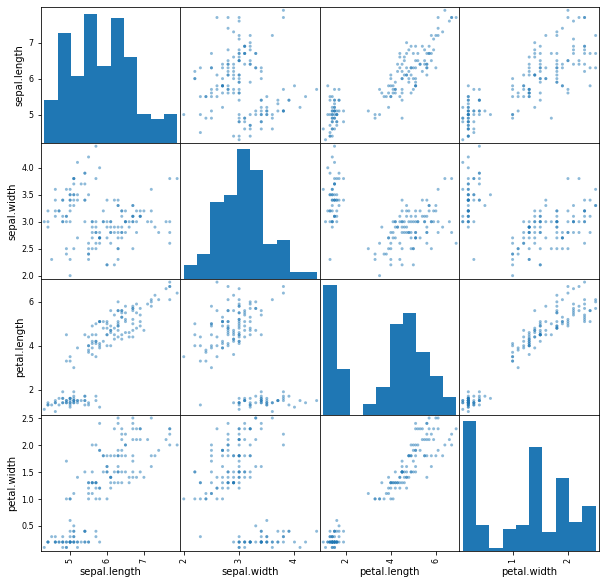

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,10))
plt.show()



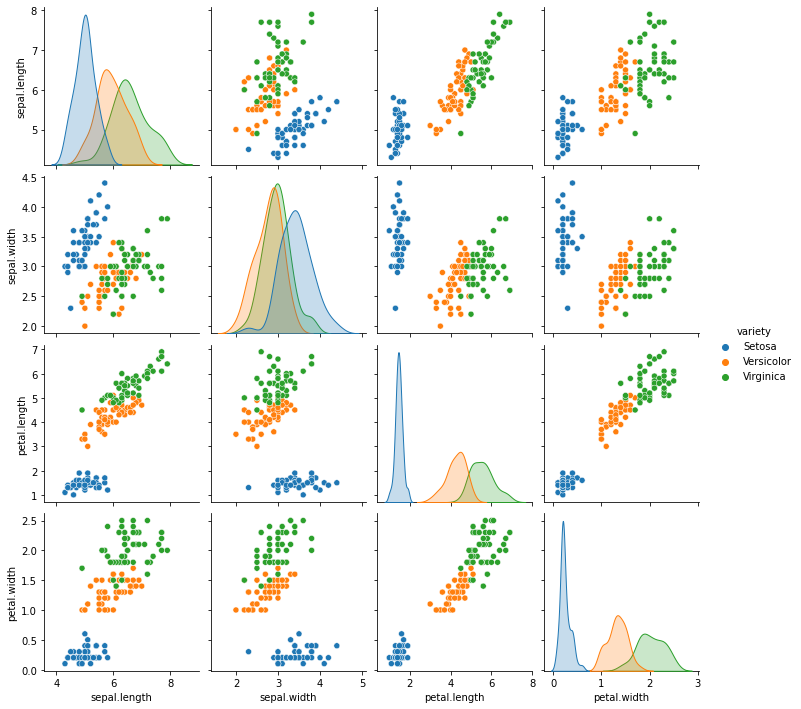

In [46]:
sns.pairplot(df, hue="variety",diag_kind="kde")


In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
